In [2]:
import pandas as pd
fake_las_kgl = pd.read_csv('fake_data/fake_data_collect_kgl_1.csv', delimiter=';')
fake_las_kgl.head()

,kgl 1,kgl 2,kgl 3,kgl 4,kgl 5,kgl 6,kgl 7,kgl 8,kgl 9,kgl 10,...,kgl 92,kgl 93,kgl 94,kgl 95,kgl 96,kgl 97,kgl 98,kgl 99,kgl 100,wc
0,0.227183,0.229219,0.226675,0.216163,0.123856,0.122162,0.124524,0.121009,0.115269,0.122897,...,0.100685,0.107715,0.117733,0.119287,0.108693,0.114867,0.147499,0.131292,0.114781,0.22
1,0.396314,0.396314,0.404986,0.305105,0.268331,0.292826,0.262488,0.282108,0.299649,0.277263,...,0.134884,0.121387,0.094553,0.120820,0.347750,0.364641,0.353523,0.336004,0.416229,0.39
2,0.293553,0.305314,0.303002,0.308562,0.310217,0.304514,0.310325,0.327548,0.289342,0.289983,...,0.421735,0.435352,0.437670,0.434946,0.434682,0.432638,0.416016,0.415558,0.420287,0.38
3,0.377523,0.377523,0.354627,0.357531,0.360867,0.344058,0.333473,0.340105,0.348635,0.345380,...,0.257030,0.288878,0.292152,0.292536,0.296641,0.307266,0.287952,0.315756,0.313107,0.31
4,0.147989,0.179315,0.208930,0.222672,0.197656,0.182883,0.177504,0.179439,0.207470,0.203137,...,0.224901,0.226155,0.237325,0.161780,0.141492,0.140836,0.125245,0.129295,0.129360,0.39


In [3]:
print(fake_las_kgl.shape)
import pandas as pd
import numpy as np
np.random.seed(10)

remove_n = 2500
drop_indices = np.random.choice(fake_las_kgl.index, remove_n, replace=False)
fake_las_kgl = fake_las_kgl.drop(drop_indices)

print(fake_las_kgl.shape)

(5322, 101)
(2822, 101)


In [4]:
fake_las_aps = pd.read_csv('fake_data/fake_data_collect_aps_1.csv', delimiter=';')
fake_las_aps.head()

,wc,aps 1,aps 2,aps 3,aps 4,aps 5,aps 6,aps 7,aps 8,aps 9,...,aps 91,aps 92,aps 93,aps 94,aps 95,aps 96,aps 97,aps 98,aps 99,aps 100
0,0.36,0.021171,0.167164,0.168517,0.180933,0.270358,0.309272,0.271265,0.183740,0.233874,...,0.695610,0.692831,0.694262,0.694691,0.681412,0.689085,0.693916,0.735912,0.730630,0.722199
1,0.30,0.767657,0.778258,0.802267,0.794221,0.804585,0.798034,0.746940,0.638812,0.550778,...,0.487127,0.520048,0.475306,0.459142,0.474802,0.416613,0.453713,0.546067,0.538811,0.533616
2,0.27,0.176442,0.279797,0.371725,0.568385,0.653522,0.676041,0.657906,0.657804,0.652358,...,0.787421,0.779257,0.823256,0.881989,0.663973,0.535756,0.554081,0.569215,0.204267,0.225243
3,0.23,0.170853,0.174758,0.172925,0.160756,0.172081,0.209677,0.255528,0.220558,0.168179,...,0.114452,0.146199,0.174419,0.204291,0.161430,0.163495,0.131638,0.138834,0.120472,0.149137
4,0.26,0.543554,0.547731,0.540833,0.543317,0.573796,0.587379,0.566171,0.573379,0.564772,...,0.283059,0.197666,0.179452,0.215053,0.215144,0.164982,0.129092,0.126563,0.159112,0.183826


In [5]:
print(fake_las_aps.shape)
import pandas as pd
import numpy as np
np.random.seed(10)

remove_n = 2500
drop_indices = np.random.choice(fake_las_aps.index, remove_n, replace=False)
fake_las_aps = fake_las_aps.drop(drop_indices)

print(fake_las_aps.shape)

(5322, 101)
(2822, 101)


In [6]:
fake_aps_kgl = pd.merge(fake_las_aps, fake_las_kgl, on=['wc'])

In [7]:
fake_aps_kgl.shape

(334188, 201)

In [8]:
y_values = fake_aps_kgl['wc']
y_values.shape

(334188,)

In [9]:
del fake_aps_kgl['wc']
fake_aps_kgl.shape

(334188, 200)

In [10]:

import numpy as np
x_values = np.array(fake_aps_kgl)
print(x_values.shape)

(334188, 200)


In [31]:
from sklearn.model_selection import train_test_split, StratifiedKFold
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values, test_size=0.5, random_state=17)

In [32]:
print(min(y_values))
print(max(y_values))
print(max(y_values) - min(y_values))

0.13
0.61
0.48


In [33]:
x_train.shape[1]

200

In [34]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Создаем последовательную модель
model = Sequential()

model.add(Dense(250, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(200, activation='relu', input_shape=(250,)))
model.add(Dense(100, activation='relu', input_shape=(200,)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', input_shape=(100,)))
model.add(Dense(49, activation='relu', input_shape=(100,)))
model.add(Dense(1))

# Компилируем модель
model.compile(loss="mse", optimizer="adam", metrics=['mae'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 250)               50250     
_________________________________________________________________
dense_25 (Dense)             (None, 200)               50200     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 49)                4949      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 50        
Total para

In [35]:
# Обучаем сеть
model.fit(x_train, y_train, batch_size=5, nb_epoch=60, verbose=1)

C:\Users\M1\Anaconda3\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/60
167094/167094 [==============================] - 89s 530us/step - loss: 0.0011 - mean_absolute_error: 0.0235
Epoch 2/60
167094/167094 [==============================] - 90s 538us/step - loss: 4.9733e-04 - mean_absolute_error: 0.0159
Epoch 3/60
167094/167094 [==============================] - 90s 540us/step - loss: 3.2661e-04 - mean_absolute_error: 0.01272s - loss: 
Epoch 4/60
167094/167094 [==============================] - 90s 539us/step - loss: 2.4716e-04 - mean_absolute_error: 0.0110
Epoch 5/60
167094/167094 [==============================] - 92s 551us/step - loss: 1.9584e-04 - mean_absolute_error: 0.0098
Epoch 6/60
167094/167094 [==============================] - 92s 552us/step - loss: 1.6468e-04 - mean_absolute_error: 0.0090
Epoch 7/60
167094/167094 [==============================] - 93s 554us/step - loss: 1.3797e-04 - mean_absolute_error: 0.0083
Epoch 8/60
167094/167094 [==============================] - 93s 554us/step - loss: 1.2286e-04 - mean_absolute_error: 0.0077
E

In [36]:
y_predict = model.predict(x_hold)

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

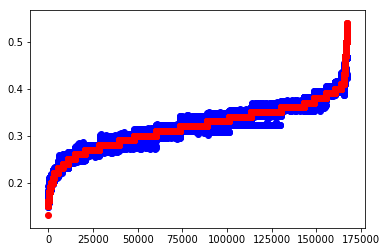

MSE                      = 2.94364521871e-05
MAE                      = 0.00395930630332
r2_score                 = 0.987036764818    (best_value is 1)
explained_variance_score = 0.988616292688    (best_value is 1)


In [38]:
predict_for_analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict[:,0]})
data_analize_func(predict_for_analize_fake)